In [40]:
import cv2
import numpy as np
import matplotlib.colors as cl

import sys
sys.path.insert(1, '../Python')

from function1 import *

import time

In [16]:
def read_image(path, mod=0):
    BGR_im = cv2.imread(path, mod)
    RGB_img = cv2.cvtColor(BGR_im, cv2.COLOR_BGR2RGB)
    # corrigir esses nomes de variáveis
    if mod == 1:
        RGB_img = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
    return RGB_img

def show_image(im, wk=0, name='image'):
    cv2.imshow(name, im, gray)
    cv2.waitKey(wk)
    cv2.destroyAllWindows()

In [5]:
path = "Fig0304(a)(breast_digital_Xray).tif"

im = read_image(path)
show_image(im)

In [6]:
im

array([[ 23,  30,  32, ..., 238, 238, 238],
       [ 38,  26,  39, ..., 238, 238, 238],
       [ 35,  21,  43, ..., 238, 238, 238],
       ...,
       [ 31,  31,  29, ...,  30,  30,  30],
       [ 31,  31,  29, ...,  30,  30,  30],
       [ 31,  31,  29, ...,  30,  30,  30]], dtype=uint8)

In [25]:
#im2 = -im
im2 = 255 - im2
show_image(im2)

In [7]:
im3 = im.astype(np.int8)

In [34]:
im4 = -im3
show_image(im4)

In [22]:
show_image(im3)

## Escala Logarítmica

### Método em Aula

In [17]:
im_double = np.double(im)/255
#show_image(im_double, name='Double')  # cv2 passa para a plca convertida para 255
# se você somar im_double + 1, a conevrsão automática corta tudo para 255
# que ultrapassar o valor 1, já que o tipo double é maior que byte
# portnto a tela ficará branca
show_image(1 + im_double, name='Double')

In [16]:
np.double(im)/255

array([[0.09019608, 0.11764706, 0.1254902 , ..., 0.93333333, 0.93333333,
        0.93333333],
       [0.14901961, 0.10196078, 0.15294118, ..., 0.93333333, 0.93333333,
        0.93333333],
       [0.1372549 , 0.08235294, 0.16862745, ..., 0.93333333, 0.93333333,
        0.93333333],
       ...,
       [0.12156863, 0.12156863, 0.11372549, ..., 0.11764706, 0.11764706,
        0.11764706],
       [0.12156863, 0.12156863, 0.11372549, ..., 0.11764706, 0.11764706,
        0.11764706],
       [0.12156863, 0.12156863, 0.11372549, ..., 0.11764706, 0.11764706,
        0.11764706]])

In [22]:
show_image(np.log(im_double))  # sem a soma, o logarítmo torna tão pequeno que muitos valores ficam abaixo
show_image(np.log(im_double + 1 ))  # até os já bancos se tornam 1 poucos ficam abaixo
# para clarear sem perdas, multiplique por uma constante
cons = 5.4
show_image(cons * np.log(im_double + 1 ))

In [31]:
show_image(im)

### Método em Vídeo

In [43]:
im_log = np.log(1+ im)

<ipython-input-43-2f3909170010>:1: RuntimeWarning: divide by zero encountered in log
  im_log = np.log(1+ im)


In [45]:
im_log

array([[3.178, 3.434, 3.496, ..., 5.477, 5.477, 5.477],
       [3.664, 3.295, 3.69 , ..., 5.477, 5.477, 5.477],
       [3.584, 3.092, 3.785, ..., 5.477, 5.477, 5.477],
       ...,
       [3.465, 3.465, 3.4  , ..., 3.434, 3.434, 3.434],
       [3.465, 3.465, 3.4  , ..., 3.434, 3.434, 3.434],
       [3.465, 3.465, 3.4  , ..., 3.434, 3.434, 3.434]], dtype=float16)

In [46]:
c = 255/(np.log(255 + 1))
c*im_log

array([[146.1, 158. , 160.9, ..., 251.9, 251.9, 251.9],
       [168.5, 151.6, 169.8, ..., 251.9, 251.9, 251.9],
       [164.9, 142.2, 174.1, ..., 251.9, 251.9, 251.9],
       ...,
       [159.4, 159.4, 156.4, ..., 158. , 158. , 158. ],
       [159.4, 159.4, 156.4, ..., 158. , 158. , 158. ],
       [159.4, 159.4, 156.4, ..., 158. , 158. , 158. ]], dtype=float16)

In [67]:
show_image((c*im_log).astype(np.uint8))

## Compactando em Funções

In [26]:
def log_clarea(im, ret=1, show=0):
    im_log = np.log(1+ im)
    c = 255/(np.log(255 + 1))
    im_log = (c*im_log).astype(np.uint8)
    if show==1:
        show_image(im_log)
    if ret==1:
        return im_log
    
def log_escu(im, show=0):  # não funciona
    im_log = np.log(1+ im)
    if show==1:
        show_image(im)

### Aplicando

In [27]:
praia = read_image("noronha-praia-sancho-vista-esquerdo-300.jpg")
show_image(praia)

In [75]:
log_escu(praia,show=1)

<ipython-input-71-51a825097943>:11: RuntimeWarning: divide by zero encountered in log
  im_log = np.log(1+ im)


In [29]:
def log_transf(im, c=1, i=1):  # altera contraste e brilho
    show_image(c * (np.log(np.double(im)/255 + i)))

def gama_trans(im, c=1, i=1):  # escurecedor
    show_image(c * ((np.double(im)/255) ** i))

In [32]:
gama_trans(praia, c=1, i=.2)

# Filtragem Espacial

## Convolução

In [95]:
# tá muito errado
def convolution(img, fil, whiter_border = 0):
    '''
        img: an image. Matrix.
        fil: 3x3 convolutional filter.
        white_border: decides if the image should 
                    be fulfilled whit zeros borders.
    '''
    #width, height = img.shape()
    final = np.array([])
    bre = 0
    for j in range(img.shape[1] + (img.shape[0] - 8)):
        line = []
        for i in range( (4 - img.shape[0] ) + img.shape[0] ):  
            try:
                conv =  np.convolve(np.flip(fil[0]), img[j,   i:i+3]) + \
                        np.convolve(np.flip(fil[1]), img[j+1, i:i+3]) + \
                        np.convolve(np.flip(fil[2]), img[j+2, i:i+3])
            except:
                bre = 1
                break
            line.append(np.copy(conv.sum()))  # testar se necessário e a sáida da soma
        if bre:
            break
        final = np.append(final, line)
    
    return final

In [2]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

In [23]:
def convolve(image, kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    
    # replica a borda da imagem com zeros em tamanho pelo
    # menos igual a metade do filtro
    pad = (kW - 1) // 2
    
    # preenchimento de borda para manter tamanho da imagem
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    print(image.shape)
    output = np.zeros((iH, iW), dtype="float32")
    
    # iteração começa selecionando o pixel central do primeiro quadrante
    # e termina no respectivo do final
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            
            # garante primeira iteração na linha zero, metade adicionada
            # termina no final da segunda metade, o "dobro", + 1 por garania
            # pois é intervalo aberto
            #
            # o mesmo vale para largura. A última iteração garante que, pela
            # iH + pad e iW + pad terminem com y e x no central final
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
    
           
            k = (roi * kernel).sum()
       
            output[y - pad, x - pad] = k
        
    #print(y - pad, y + pad + 1, "||", x - pad, x + pad + 1,"\n\n" )
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output

In [25]:
(tup[0].shape[1] - 1) // 2

1

In [7]:
img = read_image("../imagens/Fig0343(a)(skeleton_orig).tif")

In [97]:
show_image(img)

In [34]:
dX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
dY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [65]:
np.sum(np.convolve(np.flip(dX[0]), np.array([0,1,2])) + np.convolve(np.flip(dX[1]), np.array([0,1,2])))

0

In [11]:
tup = flt_sobel(img)

In [19]:
img.shape

(800, 500)

In [24]:
convolve(img, tup[0])

(802, 502)
799 802 || 499 502 




array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
show_image(convolve(img, tup[0]) + convolve(img, tup[1]))

In [100]:
show_image(cv2.filter2D(img, -1, tup[0]) + cv2.filter2D(img, -1, tup[1]))

In [76]:
tup[0].shape

(3192,)

In [117]:
print("\n",lista[0],"\n",lista[1],"\n",lista[2])


 [1, 2, 3, 4, 5, 6] 
 [7, 8, 9, 10, 11, 12] 
 [13, 14, 15, 16, 17, 18]


In [177]:
img

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18]])

In [142]:
# misericórdia
#img.shape[0] - (4 - img.shape[0])

20

In [251]:
img.shape[0]

7

In [258]:
(img.shape[0] - 8)

2

In [257]:
lista = [   [1,2,3,4,5,6], [7,8,9,10,11,12], [13,14,15,16,17,18],
            [1,2,3,4,5,6], [7,8,9,10,11,12], [13,14,15,16,17,18],
            [1,2,3,4,5,6], [7,8,9,10,11,12], [13,14,15,16,17,18],
            [1,2,3,4,5,6]]#, [7,8,9,10,11,12], [13,14,15,16,17,18]]
img = np.array( lista )

In [228]:
img.shape[1] + (img.shape[1] - 8)

4

In [96]:
# parquinho
for j in range(img.shape[1]):
    for i in range((4 - img.shape[0]) + img.shape[0]):  # se shape > 4
        print(   img[j, i:i+3],
                 img[j+1, i:i+3],
                img[j+2, i:i+3])
    print("---------")

[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0

[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0

[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0

[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0

[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0

[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
[0 0 0] [0 0 0] [0 0 0]
---------
[0 0 0] [0 0

In [259]:
# parquinho
for j in range(img.shape[1] + (img.shape[0] - 8)):
    for i in range((4 - img.shape[0]) + img.shape[0]):  # se shape > 4
        print(   img[j, i:i+3],
                 img[j+1, i:i+3],
                img[j+2, i:i+3])
    print("---------")

[1 2 3] [7 8 9] [13 14 15]
[2 3 4] [ 8  9 10] [14 15 16]
[3 4 5] [ 9 10 11] [15 16 17]
[4 5 6] [10 11 12] [16 17 18]
---------
[7 8 9] [13 14 15] [1 2 3]
[ 8  9 10] [14 15 16] [2 3 4]
[ 9 10 11] [15 16 17] [3 4 5]
[10 11 12] [16 17 18] [4 5 6]
---------
[13 14 15] [1 2 3] [7 8 9]
[14 15 16] [2 3 4] [ 8  9 10]
[15 16 17] [3 4 5] [ 9 10 11]
[16 17 18] [4 5 6] [10 11 12]
---------
[1 2 3] [7 8 9] [13 14 15]
[2 3 4] [ 8  9 10] [14 15 16]
[3 4 5] [ 9 10 11] [15 16 17]
[4 5 6] [10 11 12] [16 17 18]
---------
[7 8 9] [13 14 15] [1 2 3]
[ 8  9 10] [14 15 16] [2 3 4]
[ 9 10 11] [15 16 17] [3 4 5]
[10 11 12] [16 17 18] [4 5 6]
---------
[13 14 15] [1 2 3] [7 8 9]
[14 15 16] [2 3 4] [ 8  9 10]
[15 16 17] [3 4 5] [ 9 10 11]
[16 17 18] [4 5 6] [10 11 12]
---------
[1 2 3] [7 8 9] [13 14 15]
[2 3 4] [ 8  9 10] [14 15 16]
[3 4 5] [ 9 10 11] [15 16 17]
[4 5 6] [10 11 12] [16 17 18]
---------
[7 8 9] [13 14 15] [1 2 3]
[ 8  9 10] [14 15 16] [2 3 4]
[ 9 10 11] [15 16 17] [3 4 5]
[10 11 12] [16 17 18] [4

# Esteganografia

## Fatiamento Pixels

## Fatiamento Inverso

# Histograma

In [ ]:
# o que é

# probabilidade de umpixel na intensidade z

## Equalização de Histograma

# Detecção de Bordas

## Filtro de Sobel

In [10]:
def flt_sobel(img):
    dX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    dY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    return (dX, dY)

# Transformada de Fourier
### Domínio da Frequência

In [80]:
def spatial2frequency(img2):
    '''
        img: imagem no domínio do espaço
        
        np array da imagem no domínio da frequência
    '''
    img = img2.copy()
    img_f = np.empty(img.shape, dtype=np.complex128)
    for i,j in zip(
                np.nditer(img_f, op_flags=['readwrite']),
                np.ndindex(img_f.shape)
                ):
            i = pixel2fourier(j, img)
    np.nditer.close
    return img_f

def pixel2fourier(coord, img):
    '''
        coord: tupla com coordenadas x,y do pixel que queremos
        img: imagem no domínio do espaço
    '''
    pixel_s = 0
    x, y = coord
    M, N = img.shape
    
    for m in np.ndindex(img.shape[0]):
        for n in np.ndindex(img.shape[1]): 
            pixel_s += \
            img[m[0], n[0]] * \
            np.exp( ( -2j * np.pi ) * \
                    ( ( (x*m[0])/M ) + ( (y*n[0])/N ) )
                  )
    np.nditer.close
    return pixel_s

In [4]:
def frequency2spatial(img):
    '''
        img: imagem no domínio da frequência
        
        np array no domínio espacial
    '''
    
    img_s = np.empty(img.shape, dtype=np.int8)
    
    for i,j in zip(
                np.nditer(img_s, op_flags=['readwrite']),
                np.ndindex(img_s.shape)
                ):
            i = fourier2pixel(j, img)
            #print(i)
    np.nditer.close
    print(img_s.dtype)
    return img_s

def fourier2pixel(coord, img):
    '''
        coord: tupla com coordenadas x,y do pixel que queremos
        img: imagem no domínio da frequência
    '''
    pixel_f = 0
    x, y = coord
    M, N = img.shape
    # debugar subtraindo img.shape por 1
    for m in np.ndindex(img.shape[0]):
        for n in np.ndindex(img.shape[1]): 
            pixel_f += \
            img[m[0], n[0]] * \
            np.exp( 2j * np.pi * ( (x*m[0])/M + (y*n[0])/N ) )
            print(np.exp( 2j * np.pi * ( (x*m[0])/M + (y*n[0])/N ) ))
    #pixel_f *= 1/(M*N)
    np.nditer.close
    return pixel_f

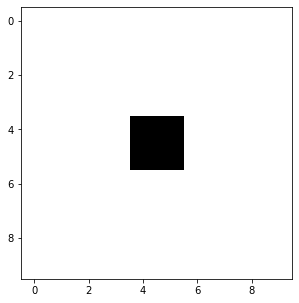

In [20]:
img_qd = read_image('../Imagens/quadrado.png', mod=1)
mostrar_img(img_qd, color='cinza')

In [21]:
img_qd.shape

(10, 10)

In [20]:
img_arr = np.array([   [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                        [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [255, 255, 255, 255,   0,   0, 255, 255, 255, 255],
                       [255, 255, 255, 255,   0,   0, 255, 255, 255, 255],
                       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
                       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]])

0.07362723350524902


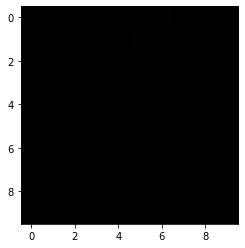

In [123]:
start = time.time()
img_outC= spatial2frequency(img_qd)
print(time.time() - start)

#mostrar_img(np.real(img_out), color="cinza", normalize=True)
normalize = cl.Normalize(vmin=0.0, vmax=1.0, clip=False)
#plt.imshow(np.real(img_out), cmap = "gray", norm=normalize, vmin = 0,vmax = 255)
img_out = np.abs(img_outC)
img2 = (img_out - img_out.min())/(img_out.max() - img_out.min())
#plt.imshow(np.abs(img_out), cmap = "gray", norm=normalize, vmin=200, vmax=250)
plt.imshow(img2, cmap="gray", vmin=0, vmax=250)

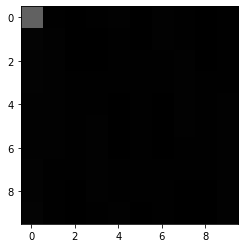

In [135]:
np.abs(np.fft.fft2(img2))

plt.imshow(np.abs(np.fft.fft2(img2)), cmap="gray", vmin=0, vmax=250)

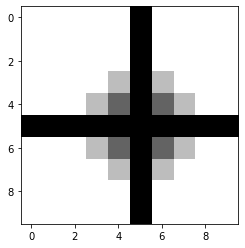

In [136]:
f = np.fft.fft2(img_qd)
#np.fft.fft2(f)
np.abs(f)
plt.imshow(np.abs(f), cmap="gray", vmin=0, vmax=250)

(244.8000000000004+0j)
(9.22598667131223+2.997704786691614j)
(-6.675986671312245-4.850388233105277j)
(3.524013328687682+4.850388233105393j)
(-0.974013328687767-2.997704786691619j)
-1.498967682156361e-14j
(-0.9740133286877244+2.9977047866915667j)
(3.524013328687826-4.85038823310526j)
(-6.675986671312214+4.85038823310526j)
(9.225986671312457-2.997704786691578j)
(9.2259866713122+2.9977047866916124j)
(-7.463980006968352-5.422898903244262j)
(4.612993335656108+6.349240626451094j)
(-1.7620066643438799-5.422898903244256j)
(-4.440892098500626e-15+2.9977047866916293j)
(1.3322676295501878e-14-3.1086244689504383e-15j)
(1.7620066643439039-2.425194116552671j)
(-4.612993335656068+3.351535839759505j)
(7.463980006968432-2.4251941165526243j)
(-9.225986671312151+4.958596058324255e-14j)
(-6.675986671312259-4.850388233105271j)
(4.612993335656108+6.3492406264511j)
(-2.062993335656199-6.349240626451086j)
(-3.552713678800501e-15+4.850388233105305j)
(0.7879933356560396-2.4251941165526474j)
(5.562217353372034e-

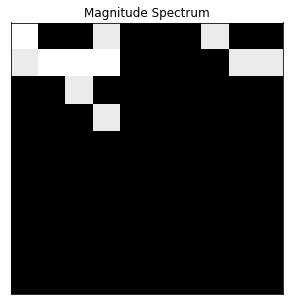

In [8]:
start = time.time()
img_out = spatial2frequency(img_qd)
print(time.time() - start)

plt.figure(figsize = (5,5))
plt.title('img')
img = np.copy(img_out)

fshift = np.fft.fftshift(img)
magnitude_spectrum = 20*np.log(np.abs(fshift))


#plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# plt.imshow(np.real(img), cmap = "gray", vmin = 0,vmax = 255)
# plt.show()

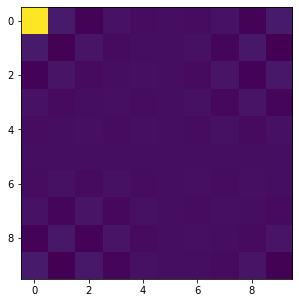

In [160]:
mostrar_img(np.real(f))